<a href="https://colab.research.google.com/github/porterjenkins/CS180/blob/main/data_science_labs/data_science_lab_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 11

In [ ]:
# Dependencies for the lab
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

## Introduction:
You will use the `sklearn` API to train various classifiers. Feel free to use any `sklearn`, `numpy`, or `pandas` function to help you with the lab.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics. The 20 categories are:
```
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
```
The posts are raw text. For example:

**Post:**
```
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----
```

**Target:**
```
'rec.autos'
```

Your task will be to build a classifier to predict the category of posts. You will do the following in this notebook:

## Exercise 1: Retrieve the Data
Download `fetch_20newsgroups` dataset

In [ ]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
docs = data['data']
targets = data["target"]
names = data.target_names

Print off the first document and its target classification to make sure its been downloaded correctly 

In [ ]:
#Enter code here.
print("Document:")
print(docs[0])
print("\nTarget classification:")
print(names[targets[0]])

Document:
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----






Target classification:
rec.autos


## Exercise 2: Understand the Data

Perform some exploratory analysis on your data. Specifically, plot a bar chart showing distribution of the categories (classes)

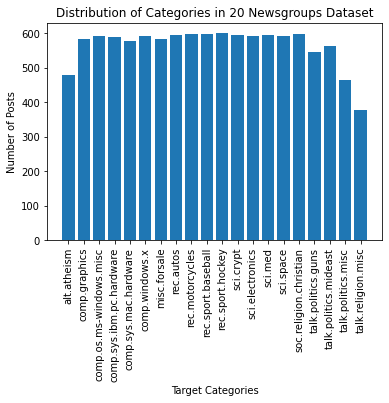

In [ ]:
#Enter code here

# Get the counts of each target category
target_counts = np.bincount(targets)

# Plot the bar chart
plt.bar(names, target_counts)
plt.xticks(rotation=90)
plt.xlabel('Target Categories')
plt.ylabel('Number of Posts')
plt.title('Distribution of Categories in 20 Newsgroups Dataset')
plt.show()

## Exercise 3: Engineer the Data
Extract features from raw text. You are free to be creative here. There is no correct answer. Try and think of the features (input) that are most predictive of the category. Some helpful sklearn feature engineering code can be found here (I'd recommend reading through the documentation before diving in and trying to get these tools to work):

* [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)
* [TFIDF Text Features](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [ ]:
#Enter code here to engineer the data
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(docs)
print(X.shape)

(11314, 5000)


## Exercise 4: Split the Data

Split your data into train and test splits. Use an 80%/20% split rule for train and test respectively. I'd recommend using the function from the last lab

In [ ]:
#Enter code here to split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, targets, test_size=0.2, random_state=42)

## Exercise 5: Train the Model

Using sklearn, train the following three classifiers using the training set:
* KNN
* Decision Tree
* Logistic Regression

In [ ]:
# Train the model using the KNN Cluster Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Train the model using the Decision Tree Algorithm
dt = DecisionTreeClassifier(max_depth=20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [ ]:
# Train the model using the Logistic Regression Algorithm
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Exercise 6: Evaluate the Model
Compare the performance of your classifiers on the test set. Discuss which one performs the best.

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Generate predictions using trained classifiers
knn_preds = knn.predict(X_test)
dt_preds = dt.predict(X_test)
lr_preds = lr.predict(X_test)

In [17]:
# Evaluate the KNN Cluster model
knn_acc = accuracy_score(y_test, knn_preds)
knn_prec = precision_score(y_test, knn_preds, average='weighted')
knn_rec = recall_score(y_test, knn_preds, average='weighted')
knn_f1 = f1_score(y_test, knn_preds, average='weighted')

In [18]:
# Evaluate the Decision Tree model
dt_acc = accuracy_score(y_test, dt_preds)
dt_prec = precision_score(y_test, dt_preds, average='weighted')
dt_rec = recall_score(y_test, dt_preds, average='weighted')
dt_f1 = f1_score(y_test, dt_preds, average='weighted')

In [19]:
# Evaluate the Logistic Regression model
lr_acc = accuracy_score(y_test, lr_preds)
lr_prec = precision_score(y_test, lr_preds, average='weighted')
lr_rec = recall_score(y_test, lr_preds, average='weighted')
lr_f1 = f1_score(y_test, lr_preds, average='weighted')

In [20]:
print("KNN accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}, F1 score: {:.3f}".format(knn_acc, knn_prec, knn_rec, knn_f1))
print("Decision Tree accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}, F1 score: {:.3f}".format(dt_acc, dt_prec, dt_rec, dt_f1))
print("Logistic Regression accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}, F1 score: {:.3f}".format(lr_acc, lr_prec, lr_rec, lr_f1))

KNN accuracy: 0.741, precision: 0.755, recall: 0.741, F1 score: 0.744
Decision Tree accuracy: 0.433, precision: 0.732, recall: 0.433, F1 score: 0.493
Logistic Regression accuracy: 0.873, precision: 0.876, recall: 0.873, F1 score: 0.872


Discuss which one performs the best:

After running the prediction evaluations and printing out the values of accuracy, precision, recall, and F1 score, we can better analyze which model performed the best. Overall, the Decision tree performed the worst, and while the KNN model was much more accurate and precise than it, the Logisitc Regression model is the algorithm that performed the best. It came in with an accuracy value of 0.873, better than the 0.741 of the KNN and 0.433 of the decision tree. It had a precision of 0.876, better than 0.755 and 0.732 of KNN and DT models respectively. It had a recall of 0.873, and an F1 score of 0.872, also both higher than the other models' values, showing that it is better at identifying all relevant cases, as well as at balancing precision and recall.